In [4]:
from fastai.vision.all import *
import gradio as gr

def is_coffee(x): return x[0].isupper()

In [5]:
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

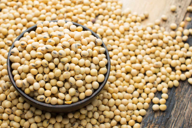

In [46]:
im = PILImage.create('soybean.jpg')
im.thumbnail((192, 192))
im

In [6]:
#| export
learn = load_learner('bean.pkl')

In [48]:
pred, idx, probs = learn.predict(im)

print(pred)
for i in probs:
    float(i)
    print(i)


soybean
TensorBase(4.2289e-07)
TensorBase(1.0000)


In [7]:
#| export
categories = ('Coffee Bean', 'Soy Bean')
# Gradio requires a dictionary of all the categories and the probabilities of each category. 
def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))
              
              

In [50]:
classify_image(im)

{'Coffee Bean': 4.22894061102852e-07, 'Soy Bean': 0.9999995231628418}

In [8]:
#| export
image = gr.components.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['coffee.jpg', 'kidney.jpg', 'soybean.jpg', 'fresh coffee bean.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False, share=True)

C:\Users\Josh\anaconda3\lib\site-packages\gradio\outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\Josh\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://1ed53b80387c22af.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


In [2]:
!pip install nbdev
from nbdev.export import notebook2script
notebook2script('beanappgradio.ipynb')

     ---------------------------------------- 64.1/64.1 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 58.1/58.1 kB 3.2 MB/s eta 0:00:00


ImportError: cannot import name 'notebook2script' from 'nbdev.export' (C:\Users\Josh\anaconda3\lib\site-packages\nbdev\export.py)